<a href="https://colab.research.google.com/github/vivekpenuli/statistics/blob/master/statistics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'

In [ ]:
df=pd.read_csv(url)
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
df.Population

In [ ]:
df['Population'].mean()

6162876.3

In [ ]:
print(df['Population'].median())

4436369.5


In [ ]:
from scipy.stats import trim_mean

[link text](https://docs.google.com/drawings/d/1wzlTaj3dhI1naU4suhedP-6sGWE3xgn5mL-KEZuKr5A/edit?usp=sharing)

In [ ]:
print(trim_mean(df['Population'], 0.1))      # it is not sensitive to  outlier like median 

4783697.125


# note : The mean is bigger than the trimmed mean, which is bigger than the median.
because trim mean exclude teh 10 % from each side

weighted mean

Another type of mean is a weighted mean, which you calculate by multiplying each data value xi by a user-specified weight wi and dividing their sum by the sum of the weights. The formula for a weighted mean is:

Weightedmean=x¯w=∑ni=1wixi∑ni=1wi
There are two main motivations for using a weighted mean:

Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.

The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

In [ ]:
import numpy as np

[link text](https://www.mathsisfun.com/data/weighted-mean.html)

In [ ]:
print(df['Murder.Rate'].mean())          
  # here calculating the murder rate mean do not generaly give 
  #us the mean murder rate because here murder also depend on poplulation

4.066


In [ ]:
print(np.average(df['Murder.Rate'], weights=df['Population']))


4.445833981123393


#variance


In [ ]:
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
print(df['Population'].std()) # not a good way to check the variance 
#because standard deviation is effective by outliers


6848235.347401142


# better way

The median absolute deviation (MAD, [1]) computes the median over the absolute deviations from the median. It is a measure of dispersion similar to the standard deviation but more robust to outliers 

In [ ]:
from scipy import stats

[link text](https://www.statisticshowto.com/median-absolute-deviation/)

In [ ]:
stats.median_absolute_deviation(df['Population'])

3849870.3852

In [ ]:
print(abs(df['Population'] - df['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [ ]:
print(df['Population'].quantile(0.75) - df['Population'].quantile(0.25))


4847308.0


#Percentiles and Boxplots
Pandas has the quantile method for data frames.

In [ ]:
print(df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [ ]:
print(df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
# 0.5 is also called mean of the dataset

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64


In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(df['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())   # better way to do find qantile

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


visualization of qunatile ,median etc:

In [ ]:
import seaborn as sns


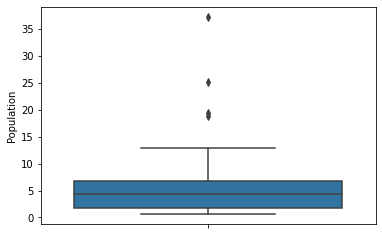

In [ ]:
ax = sns.boxplot(x=df['Population']/1000000,orient='v')

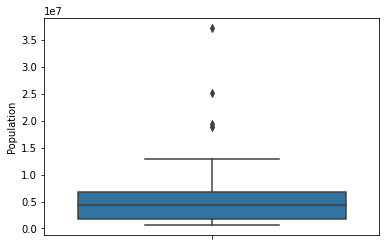

In [ ]:
ax = sns.boxplot(x=df["Population"],orient='v')

In [ ]:
print(df['Population'].head(5))   #here each state have different population in number
# some can have large population some can have low population

0     4779736
1      710231
2     6392017
3     2915918
4    37253956
Name: Population, dtype: int64


In [ ]:
print( (df['Population']/1000000).head(5)) # here now each state have population divided in million 

0     4.779736
1     0.710231
2     6.392017
3     2.915918
4    37.253956
Name: Population, dtype: float64


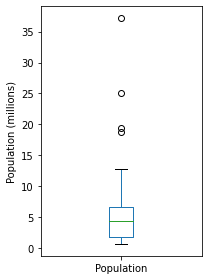

In [ ]:
import matplotlib.pyplot as plt

ax = (df['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

 # Histograms
 when dealing with graph in population try to make population in million
 beacuse it help us to sumarise the graph more preciously 

In [ ]:
binnedPopulation = pd.cut(df['Population'],bins=10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


[link text](https://matplotlib.org/3.2.1/tutorials/intermediate/tight_layout_guide.html)

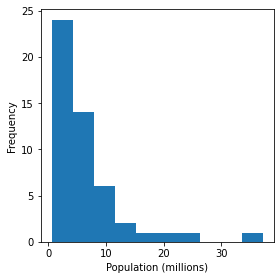

In [ ]:
# this is the actual graph of above table
ax = (df['Population']/1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()  # use of tight_layout in comment
plt.show()

In [ ]:
may = pd.cut(df['Population']/1000000,bins=[0,5,10,15,20,25,30,35,40,45,50])
print(may.value_counts())

(0, 5]      28
(5, 10]     15
(10, 15]     3
(15, 20]     2
(35, 40]     1
(25, 30]     1
(45, 50]     0
(40, 45]     0
(30, 35]     0
(20, 25]     0
Name: Population, dtype: int64


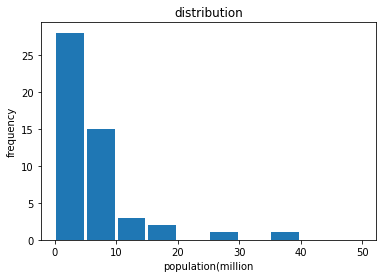

In [77]:
bins=[0,5,10,15,20,25,30,35,40,45,50]  # here these are the frequency intervals we are intrested in .
# here the minimum frequency is 0 therfore bins should contrain 0 
plt.title("distribution")
plt.xlabel('population(million')
plt.ylabel("frequency")
plt.hist(df['Population']/1000000,rwidth=0.9,bins=bins)
plt.show()

#Density Estimates

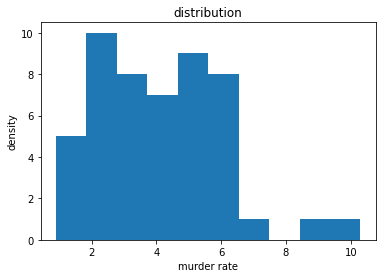

In [92]:
plt.title("distribution")
plt.xlabel('murder rate')
plt.ylabel("density")
plt.hist(df['Murder.Rate'])
plt.show()

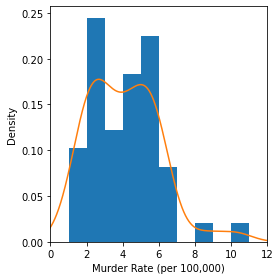

In [82]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()